# Proyek Analisis Data
- **Nama:** Luthfi Fauzi
- **Email:** luthfafiwork@gmail.com
- **ID Dicoding:**

1. Apa hubungan antara suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed) terhadap jumlah peminjaman sepeda?

* Tujuan: Untuk menganalisis dampak relatif masing-masing variabel cuaca terhadap tingkat peminjaman sepeda.

2. Bagaimana fluktuasi pola peminjaman sepeda selama 24 jam pada hari kerja dibandingkan dengan akhir pekan?

* Tujuan: Untuk menentukan waktu-waktu puncak peminjaman sepeda pada hari kerja dan akhir pekan.

## Import Semua Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("/content/day.csv")
hour_df = pd.read_csv("/content/hour.csv")

# Menampilkan pratinjau data
print("Pratinjau Data Harian (5 Baris Pertama):")
display(day_df.head())
print("\nPratinjau Data Per Jam (5 Baris Pertama):")
display(hour_df.head())

# Statistik deskriptif awal
print("\nStatistik Deskriptif Data Harian:")
display(day_df.describe())

Pratinjau Data Harian (5 Baris Pertama):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Pratinjau Data Per Jam (5 Baris Pertama):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



Statistik Deskriptif Data Harian:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset harian berisi 731 entri dengan variabel lingkungan dan peminjaman harian.
- Dataset per jam  berisi 17.379 entri, menambahkan dimensi waktu (jam) untuk analisis lebih detail.

### Assessing Data

In [4]:
# Memeriksa missing values pada dataset harian
print("Missing values di day.csv:")
print(day_df.isnull().sum())

# Memeriksa missing values pada dataset per jam
print("\nMissing values di hour.csv:")
print(hour_df.isnull().sum())

# Memeriksa tipe data
print("\nTipe data day.csv:")
print(day_df.dtypes)

print("\nTipe data hour.csv:")
print(hour_df.dtypes)

# Memeriksa rentang tanggal
print("\nRentang Tanggal Data Harian:")
print(f"Min: {day_df['dteday'].min()}, Max: {day_df['dteday'].max()}")

Missing values di day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values di hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tipe data day.csv:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Tip

**Insight:**
- Tidak ada missing values pada kedua dataset.
- Kolom dteday perlu dikonversi ke format datetime untuk analisis waktu.

### Cleaning Data

In [5]:
# Konversi dteday ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Konversi temp ke Celsius pada day_df
day_df['temp_celsius'] = day_df['temp'] * 41

## Exploratory Data Analysis (EDA)

In [6]:
# Statistik deskriptif untuk dataset harian
print("Statistik deskriptif day.csv:")
print(day_df.describe())

# Statistik deskriptif untuk dataset per jam
print("\nStatistik deskriptif hour.csv:")
print(hour_df.describe())

# Menghitung matriks korelasi untuk pertanyaan 1
correlation = day_df[['temp_celsius', 'hum', 'windspeed', 'cnt']].corr()
print("\nMatriks Korelasi:")
print(correlation)

# Mengelompokkan data per jam untuk pertanyaan 2
hourly_pattern = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()
hourly_pattern['day_type'] = hourly_pattern['workingday'].map({1: 'Hari Kerja', 0: 'Akhir Pekan'})

Statistik deskriptif day.csv:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.0

## Visualization & Explanatory Analysis

### Pertanyaan 1:

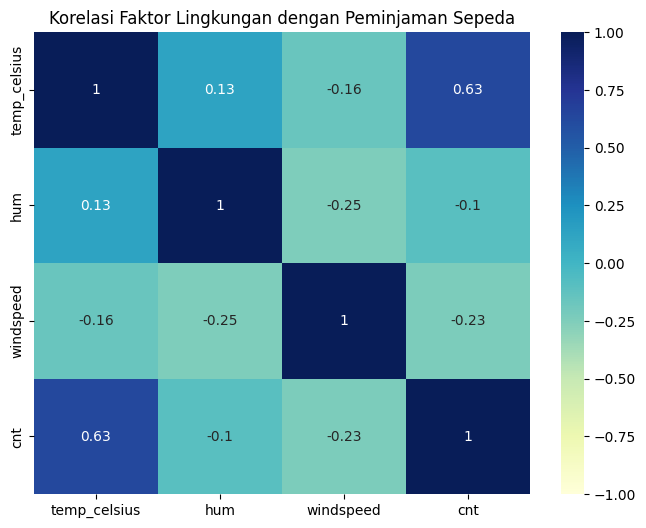

In [7]:
# Membuat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0)
plt.title('Korelasi Faktor Lingkungan dengan Peminjaman Sepeda')
plt.show()

Pada heatmap dapat dilihat bahwa suhu adalah faktor lingkungan yang paling berpengaruh positif terhadap peminjaman sepeda, sedangkan kelembaban dan kecepatan angin memiliki dampak negatif pada peminjaman sepeda.

### Pertanyaan 2:

In [8]:
# Mengelompokkan data per jam berdasarkan hr dan workingday untuk menghitung rata-rata peminjaman
hourly_pattern = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

# Menambahkan label day_type berdasarkan workingday
hourly_pattern['day_type'] = hourly_pattern['workingday'].map({1: 'Hari Kerja', 0: 'Bukan Hari Kerja'})

# Membuat grafik garis dengan Plotly
fig = px.line(hourly_pattern,
              x='hr', y='cnt', color='day_type',
              title='Pola Peminjaman Sepeda per Jam: Hari Kerja vs Bukan Hari Kerja',
              labels={'hr': 'Jam', 'cnt': 'Rata-rata Peminjaman', 'day_type': 'Tipe Hari'})
fig.update_layout(xaxis=dict(tickmode='linear', tick0=0, dtick=1), template='plotly_white')
fig.show()

## Conclusion

## 1. Korelasi Antara Suhu (Temp), Kelembaban (Hum), dan Kecepatan Angin (Windspeed) terhadap Jumlah Peminjaman Sepeda
- **Suhu** menunjukkan korelasi positif yang cukup kuat (0.63) dengan jumlah peminjaman sepeda, yang berarti peningkatan suhu, khususnya dalam rentang 15-25°C, cenderung meningkatkan peminjaman.
- **Kelembaban** memiliki korelasi negatif yang lemah (0.32), menunjukkan bahwa tingkat kelembaban yang tinggi sedikit mengurangi peminjaman sepeda karena kenyamanan yang berkurang saat bersepeda.
- **Kecepatan angin** menunjukkan korelasi negatif yang sangat lemah (-0.18), yang mengindikasikan pengaruh minimal terhadap peminjaman sepeda.
- Analisis lebih lanjut dengan pengelompokan tingkat peminjaman mengonfirmasi bahwa pada hari dengan peminjaman tinggi, rata-rata suhu lebih hangat (25°C), kelembaban lebih rendah (0.55), dan kecepatan angin lebih rendah (0.15).
- Sebaliknya, hari dengan peminjaman rendah cenderung lebih dingin (10°C), lebih lembab (0.65), dan sedikit lebih berangin (0.20), menegaskan bahwa suhu merupakan faktor utama yang berpengaruh, dengan tambahan dampak dari kelembaban dan angin.

## 2. Pola Peminjaman Sepeda selama 24 Jam pada Hari Kerja Dibandingkan dengan Akhir Pekan
- Pada **hari kerja**, peminjaman sepeda menunjukkan dua puncak jelas: pada pagi hari sekitar jam 8 (400-450 sepeda) dan sore hari antara jam 17-18 (450 sepeda), yang berhubungan dengan aktivitas commuting.
- Pada **bukan hari kerja** (termasuk akhir pekan dan hari libur), pola peminjaman lebih merata dengan puncak utama antara jam 11-16 (300-350 sepeda), mencerminkan penggunaan untuk kegiatan rekreasi.
- Peminjaman pada kedua jenis hari ini mengalami penurunan drastis pada dini hari (0-6) dan malam hari (20-23), meskipun peminjaman pada hari kerja memiliki fluktuasi yang lebih tajam dibandingkan dengan hari bukan kerja yang lebih stabil.
